<a href="https://colab.research.google.com/github/milanajudiya/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price.**

###**Battery_power** - Total energy a battery can store in one time measured in mAh
###**Blue** - Has bluetooth or not
###**Clock_speed** - speed at which microprocessor executes instructions
###**Dual_sim** - Has dual sim support or not
###**Fc** - Front Camera mega pixels
###**Four_g** - Has 4G or not
###**Int_memory** - Internal Memory in Gigabytes
###**M_dep** - Mobile Depth in cm
###**Mobile_wt** - Weight of mobile phone
###**N_cores** - Number of cores of processor
###**Pc** - Primary Camera mega pixels
###**Px_height** - Pixel Resolution Height
###**Px_width** - Pixel Resolution Width
###**Ram** - Random Access Memory in Mega Bytes
###**Sc_h** - Screen Height of mobile in cm
###**Sc_w** - Screen Width of mobile in cm
###**Talk_time** - longest time that a single battery charge will last 
###**Three_g**- Has 3G or not
###**Touch_screen** - Has touch screen or not
###**Wifi** - Has wifi or not
###**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Mobile price range prediction/data_mobile_price_range.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.shape

(2000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
df_mobile=df.copy()

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Battery power')

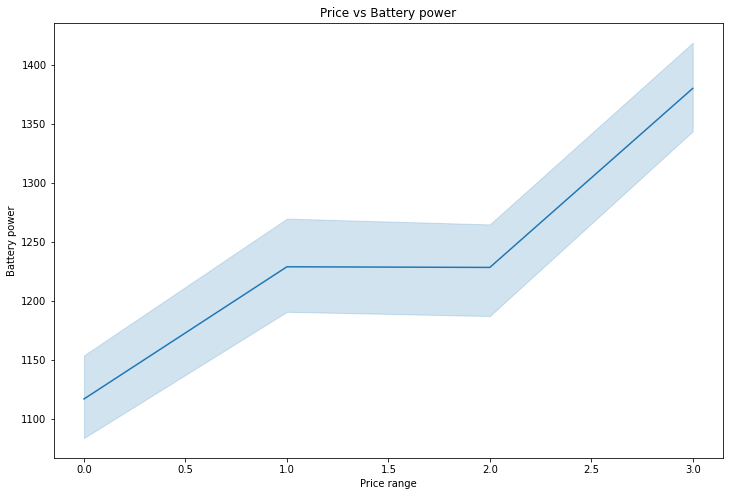

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot("price_range","battery_power",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Battery power")
plt.title("Price vs Battery power")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Ram')

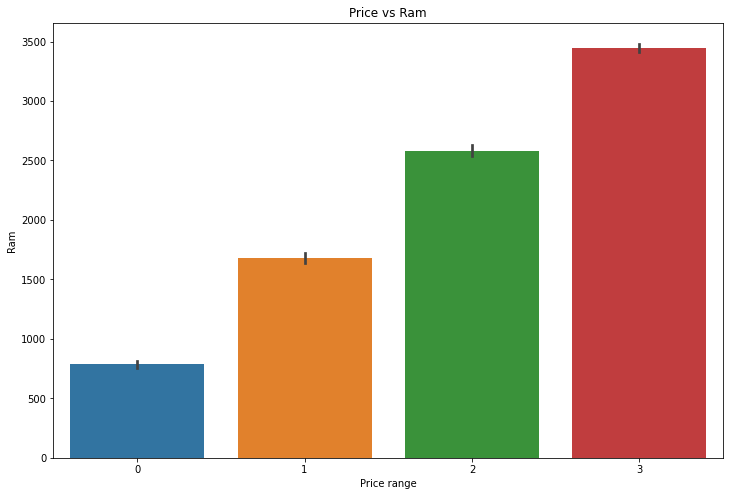

In [34]:
plt.figure(figsize=(12,8))
sns.barplot("price_range","ram",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Ram")
plt.title("Price vs Ram")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Touch screen')

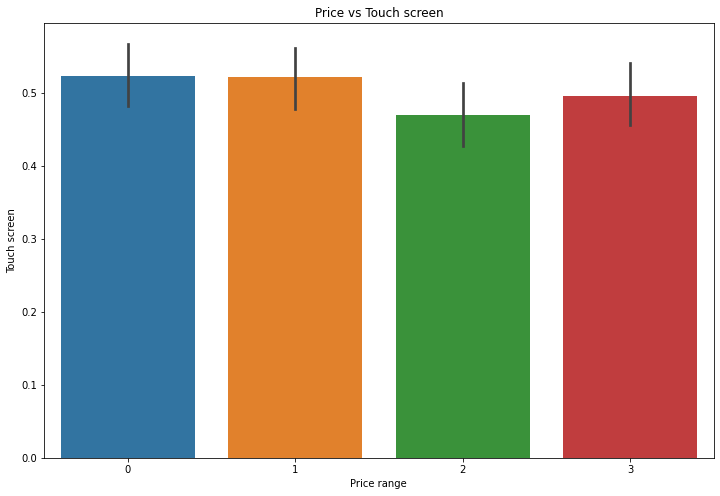

In [31]:
plt.figure(figsize=(12,8))
sns.barplot("price_range","touch_screen",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Touch screen")
plt.title("Price vs Touch screen")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Touch screen')

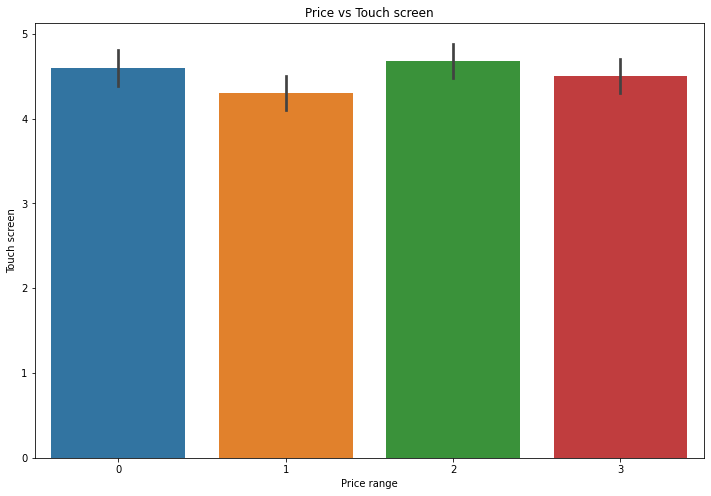

In [36]:
plt.figure(figsize=(12,8))
sns.barplot("price_range","n_cores",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Touch screen")
plt.title("Price vs Touch screen")

([<matplotlib.patches.Wedge at 0x7f671d3ddcd0>,
 [Text(-1.0998642959886566, -0.01727803256672628, 'Bluthoot support'),
  Text(1.0998642959886566, 0.017278032566726147, 'Bluthoot Not Support')],
 [Text(-0.5999259796301762, -0.009424381400032515, '50.5%'),
  Text(0.5999259796301762, 0.009424381400032442, '49.5%')])

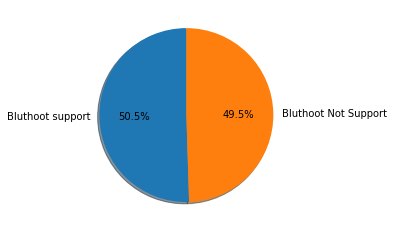

In [46]:
data=df_mobile["blue"].value_counts().values
labels=["Bluthoot support","Bluthoot Not Support"]
plt.pie(data,labels=labels,autopct="%.01f%%",shadow=True,startangle=90)

([<matplotlib.patches.Wedge at 0x7f671d0c2310>,
 [Text(-1.097491732278043, -0.07424215501546373, '4G - support'),
  Text(1.0974917322780433, 0.07424215501546359, '4G - Not Support')],
 [Text(-0.5986318539698416, -0.04049572091752567, '52.1%'),
  Text(0.5986318539698418, 0.040495720917525596, '47.9%')])

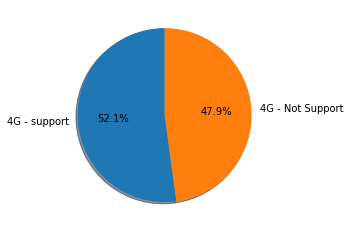

In [47]:
data=df_mobile["four_g"].value_counts().values
labels=["4G - support","4G - Not Support"]
plt.pie(data,labels=labels,autopct="%.01f%%",shadow=True,startangle=90)

([<matplotlib.patches.Wedge at 0x7f671d32c410>,
 [Text(-0.749214765200941, -0.8054050133969238, '3G - support'),
  Text(0.7492147652009411, 0.8054050133969237, '3G - Not Support')],
 [Text(-0.40866259920051323, -0.43931182548923114, '76.2%'),
  Text(0.4086625992005133, 0.4393118254892311, '23.8%')])

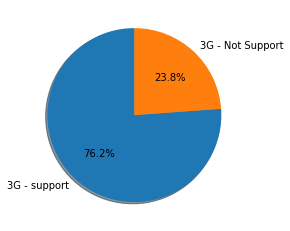

In [49]:
data=df_mobile["three_g"].value_counts().values
labels=["3G - support","3G - Not Support"]
plt.pie(data,labels=labels,autopct="%.01f%%",shadow=True,startangle=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of 3G Mobile')

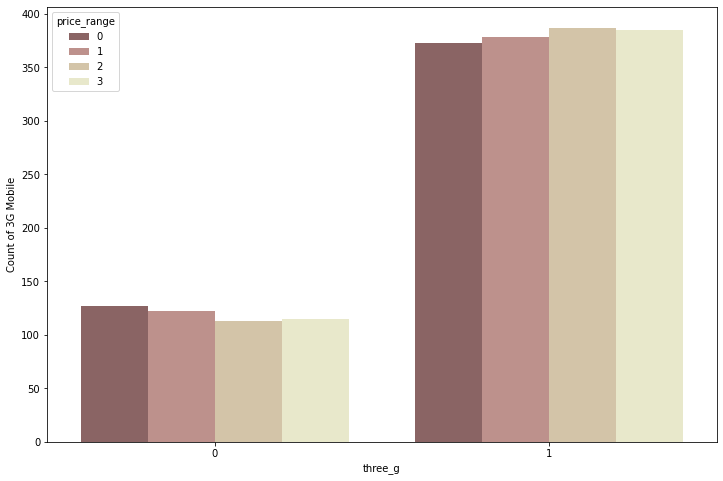

In [59]:
plt.figure(figsize=(12,8))
sns.countplot("three_g",hue="price_range",palette="pink",data=df_mobile)
plt.xlabel("three_g")
plt.ylabel("Count of 3G Mobile")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of 4G Mobile')

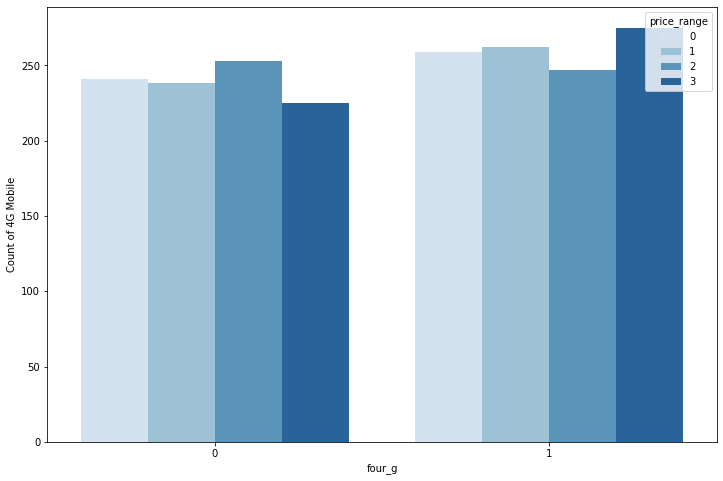

In [61]:
plt.figure(figsize=(12,8))
sns.countplot("four_g",hue="price_range",palette="Blues",data=df_mobile)
plt.xlabel("four_g")
plt.ylabel("Count of 4G Mobile")